# Quant Analyst Intern Assessment

## Section #1: Univariate Time Series Analysis 

### 1. In this section, you will build an ARIMA Model for USD/CAD utilizing daily data. Please use Jupyter Notebook for this exercise. You may answer all questions in MARKDOWN inside the Jupyter Notebook.

#### a.	[ Variable d ] What is the optimal order of differencing in the ARIMA model? Explain how you derived the variable d by using first using ACF and cross-checking with ADF/KPSS/ PP tests. You may plot the relevant charts and tables in the Jupyter cell. 

### Data Processing

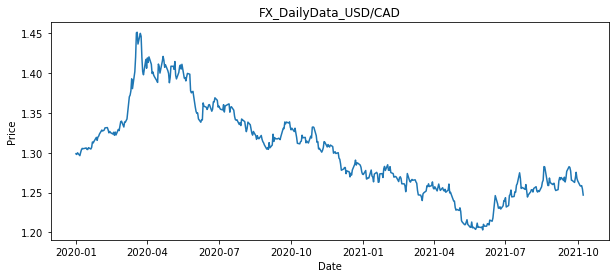

In [1]:
# Data Processing
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

FXdata_usd_cad = pd.read_csv('./USD_CAD_2year.csv') # Read USD/CAD data.

FXdata_usd_cad['Date'] = pd.to_datetime(FXdata_usd_cad['Date'])
FXdata_usd_cad.index = FXdata_usd_cad['Date']  # Convert date format

DailyFX = plt.figure(figsize = (10, 4))
ax = DailyFX.add_subplot(111)
ax.set(title = 'FX_DailyData_USD/CAD',
        ylabel = 'Price', xlabel='Date')

plt.plot(FXdata_usd_cad['Date'], FXdata_usd_cad['Price'])
plt.show()    # Trend view of USD/CAD price

In [2]:
def generate_price():
    
    """
    Method: model training and test data
    Data: USD/CAD 1/1/2020-10/8/2021
    Source: investing.com
    """
    
    import pandas as pd
    
    # Read the required data
    FX_data = pd.read_csv('./USD_CAD_2year.csv')
    data = FX_data.iloc[:, :2]
    
    # Split the training and test data, ratio 7:3
    num_row = int(len(data)*0.7)
    data_train = data.iloc[:num_row, :]
    data_test = data.iloc[num_row:, :]
    
    # Store the data for modeling
    data_train.to_csv('./data_train.csv', index = False, header = True)
    data_test.to_csv('./data_test.csv', index = False, header = True)

    
generate_price()

### ADF: Augmented Dickey-Fuller Unit Root  Tests

##### Check if it is a stationary series

Result of ADF--ct Test 
timeseries_adf :  (-2.7300323163758193, 0.22382564047373543, 0, 323, {'1%': -3.9870746386005544, '5%': -3.4241705267641804, '10%': -3.135093239060335}, -2175.0550116457725)
timeseries_diff1_adf :  (-18.38828970691862, 0.0, 0, 323, {'1%': -3.9870746386005544, '5%': -3.4241705267641804, '10%': -3.135093239060335}, -2165.0094636083095)
timeseries_diff2_adf :  (-7.986960241044471, 7.658670513210018e-11, 13, 310, {'1%': -3.988273868450203, '5%': -3.4247481307777514, '10%': -3.1354322392668927}, -2131.899853200719)


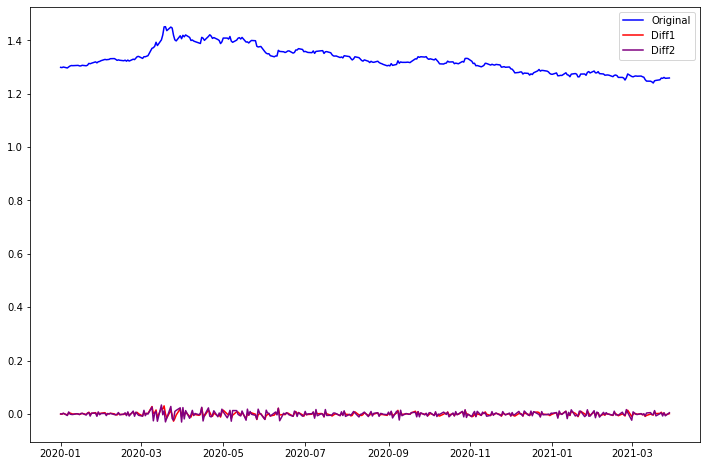

Result of ADF--c Test 
timeseries_adf :  (-0.9720410792877197, 0.7633246218887659, 0, 323, {'1%': -3.4507587628808922, '5%': -2.870530068560499, '10%': -2.5715597727381647}, -2166.2069654616953)
timeseries_diff1_adf :  (-18.310433361437262, 2.2766951895326197e-30, 0, 323, {'1%': -3.4507587628808922, '5%': -2.870530068560499, '10%': -2.5715597727381647}, -2165.5705512029754)
timeseries_diff2_adf :  (-7.999214835671945, 2.358649777001286e-12, 13, 310, {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}, -2133.8427762975107)


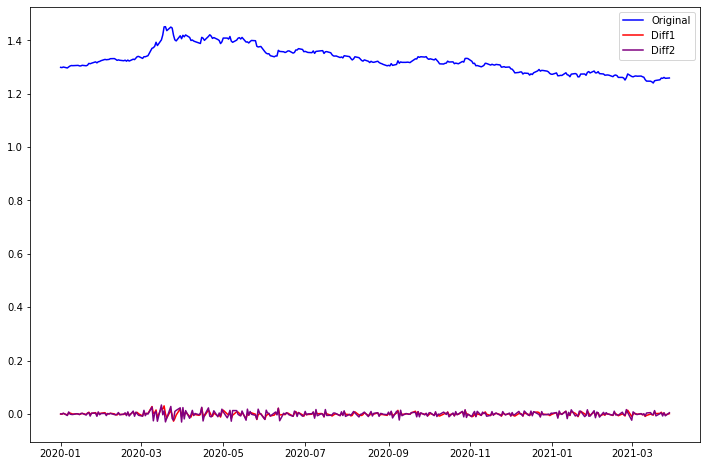

Result of ADF--nc Test 
timeseries_adf :  (-0.3581358513159716, 0.5533552307203519, 0, 323, {'1%': -2.5726967464463377, '5%': -1.9418629061369832, '10%': -1.616022970158673}, -2167.456658114268)
timeseries_diff1_adf :  (-18.332823714699057, 4.1754159346625616e-29, 0, 323, {'1%': -2.5726967464463377, '5%': -1.9418629061369832, '10%': -1.616022970158673}, -2167.356325268539)
timeseries_diff2_adf :  (-8.013046272885692, 3.063722599078629e-13, 13, 310, {'1%': -2.57299, '5%': -1.9419004191534357, '10%': -1.6159906158235708}, -2135.841813630652)


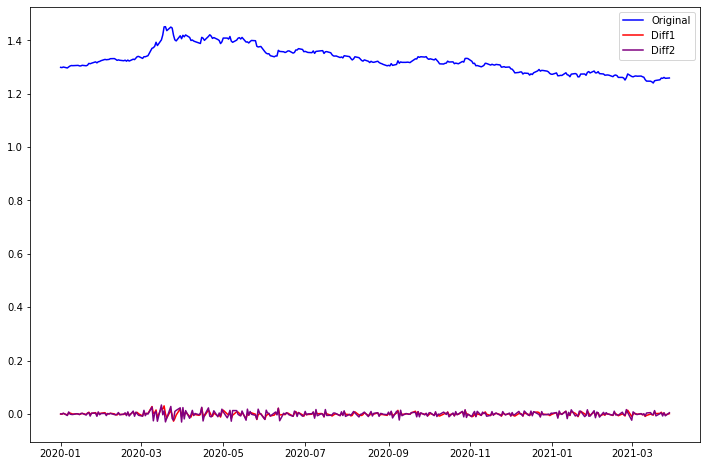

In [6]:
def ADF_diff(timeseries):
    
    """
    ADF: Augmented Dickey-Fuller unit root test.
    
    Regression: Constant and trend order to include {“c”,”ct”,”ctt”,”nc”}
    1. “c” : constant only (default).
    2. “ct” : constant and trend.
    3. “ctt” : constant, and linear and quadratic trend.
    4. “nc” : no constant, no trend.
    """

    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.tsa.stattools import adfuller as ADF
    
    # Sequence after generating the differencing.
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)

    # ADF unit root test -- ct
    print('Result of ADF--ct Test ')
    timeseries_adf = ADF(timeseries['Price'].tolist(), regression='ct')
    timeseries_diff1_adf = ADF(timeseries_diff1['Price'].tolist(), regression='ct')
    timeseries_diff2_adf = ADF(timeseries_diff2['Price'].tolist(), regression='ct')

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()
    
    # ADF unit root test -- c
    print('Result of ADF--c Test ')
    timeseries_adf = ADF(timeseries['Price'].tolist(), regression='c')
    timeseries_diff1_adf = ADF(timeseries_diff1['Price'].tolist(), regression='c')
    timeseries_diff2_adf = ADF(timeseries_diff2['Price'].tolist(), regression='c')

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()
    
    # ADF unit root test -- nc
    print('Result of ADF--nc Test ')
    timeseries_adf = ADF(timeseries['Price'].tolist(), regression='nc')
    timeseries_diff1_adf = ADF(timeseries_diff1['Price'].tolist(), regression='nc')
    timeseries_diff2_adf = ADF(timeseries_diff2['Price'].tolist(), regression='nc')

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()

    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse)
ADF_diff(price_train)

In [101]:
"""
def KPSS_test(timeseries):
    
    # KPSS: Kwiatkowski–Phillips–Schmidt–Shin unit root test
    
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.tsa.stattools import kpss
    
    # Sequence after generating the differencing.
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)
    
    # KPSS unit root test
    print('Result of KPSS Test ')
    timeseries_kpss = kpss(timeseries)
    timeseries_diff1_kpss = kpss(timeseries_diff1)
    timeseries_diff2_kpss = kpss(timeseries_diff2)

    print('timeseries_kpss : ', timeseries_kpss)
    print('timeseries_diff1_kpss : ', timeseries_diff1_kpss)
    print('timeseries_diff2_kpss : ', timeseries_diff2_kpss)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()
    
    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse)
KPSS_test(price_train)

"""

"\ndef KPSS_test(timeseries):\n    \n    # KPSS: Kwiatkowski–Phillips–Schmidt–Shin unit root test\n    \n    from statsmodels.tsa.stattools import kpss\n    \n    # Sequence after generating the difference.\n    timeseries_diff1 = timeseries.diff(1)\n    timeseries_diff2 = timeseries_diff1.diff(1)\n\n    timeseries_diff1 = timeseries_diff1.fillna(0)\n    timeseries_diff2 = timeseries_diff2.fillna(0)\n    \n    # KPSS unit root test\n    print('Result of KPSS Test ')\n    timeseries_kpss = kpss(timeseries)\n    timeseries_diff1_kpss = kpss(timeseries_diff1)\n    timeseries_diff2_kpss = kpss(timeseries_diff2)\n\n    print('timeseries_kpss : ', timeseries_kpss)\n    print('timeseries_diff1_kpss : ', timeseries_diff1_kpss)\n    print('timeseries_diff2_kpss : ', timeseries_diff2_kpss)\n\n    plt.figure(figsize=(12, 8))\n    plt.plot(timeseries, label='Original', color='blue')\n    plt.plot(timeseries_diff1, label='Diff1', color='red')\n    plt.plot(timeseries_diff2, label='Diff2', color='pu

#### The optimal order of differencing in the ARIMA model is 1.

### ACF: Auto-Correlation Function

##### View the auto-correlation and partial auto-correlation of data

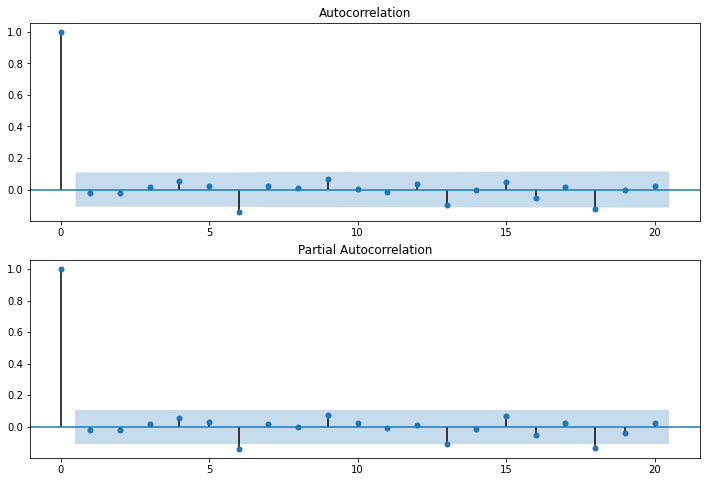

In [7]:
def autocorrelation(timeseries, lags):
    
    """
    View the auto-correlation and partial auto-correlation of data
    
    ACF: auto-correlation function which gives us values of auto-correlation of any series with its lagged values.
    PACF: partial auto-correlation function which finds correlation of the residuals with the next lag value.
    """
    
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt

    # ACF of data
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    
    # DCF of data
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()

    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse)

price_train_diff = price_train.diff(1)
price_train_diff = price_train_diff.fillna(0)  # optimal order of differencing is one.

autocorrelation(price_train_diff, 20)

### IC: Information Criterion

##### determine p and q values

In [8]:
def IC(timeseries):
    
    """
    IC(Information Criterion): to determine p and q values
    
    AIC: Akaike Information Criterion
    BIC: Bayesian Information Criterion
    """
    
    import statsmodels.api as sm
    
    # calculate AIC and BIC.
    IC_evaluate = sm.tsa.arma_order_select_ic(timeseries, ic=['aic', 'bic'], trend='nc', max_ar=6,
                                            max_ma=6)
    print('AIC', IC_evaluate.aic_min_order)
    print('BIC', IC_evaluate.bic_min_order)

    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse) 

price_train_diff = price_train.diff(1)
price_train_diff = price_train_diff.fillna(0)  # optimal order of differencing is one.

IC(price_train_diff)

/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encounter

AIC (3, 2)
BIC (0, 1)


##### From acf and pacf, p and q should be 1. But this result is more subjective.

##### The AIC/BIC results are more objective, the first is 3 and 2, the second is 0 and 1.

##### When using the ARIMA model, it need to build a model to try and determine the optimal parameters

### ARIMA_Model


In [9]:
def ARIMA_Model(timeseries, order):
    
    """
    ARIMA Model
    
    Notes:
    1. Time series data should choose the stationary series after differencing.
    2. Order includes p, d, q. 
        p is the order of AR. 
        d is the order of differencing. 
        q is the order of MA.
    3. Pandas will automatically determine the frequency of the data.
    """
    
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.tsa.arima.model import ARIMA

    # Fit ARIMA Model
    model = ARIMA(timeseries, order=order)
    model_fit = model.fit()
    print(model_fit.summary())  # Summary of ARIMA

    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse) 

price_train_diff = price_train.diff(1)
price_train_diff = price_train_diff.fillna(0)  # optimal order of differencing is one.

# Model training
ARIMA_Model(price_train_diff, (0,1,1))
ARIMA_Model(price_train_diff, (1,1,1))
ARIMA_Model(price_train_diff, (3,1,2))

/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  324
Model:                 ARIMA(0, 1, 1)   Log Likelihood                1149.634
Date:                Tue, 12 Oct 2021   AIC                          -2295.267
Time:                        11:16:56   BIC                          -2287.712
Sample:                    01-01-2020   HQIC                         -2292.251
                         - 03-29-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9908      0.015    -67.980      0.000      -1.019      -0.962
sigma2       4.68e-05   2.42e-06     19.305      0.000     4.2e-05    5.15e-05
Ljung-Box (Q):                       51.19   Jarque-

/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  324
Model:                 ARIMA(3, 1, 2)   Log Likelihood                1149.851
Date:                Tue, 12 Oct 2021   AIC                          -2287.702
Time:                        11:16:56   BIC                          -2265.036
Sample:                    01-01-2020   HQIC                         -2278.654
                         - 03-29-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0269      0.536     -1.914      0.056      -2.078       0.025
ar.L2         -0.0535      0.061     -0.874      0.382      -0.174       0.067
ar.L3         -0.0240      0.045     -0.535      0.5

##### Order includes p, d, q. 
    p is the order of AR. 
    d is the order of differencing. 
    q is the order of MA.

##### The smaller the AIC/BIC, the better.

##### The coef is the coefficient of our model. 

##### If the p value is less than 0.05, it is valid. If it is greater than 0.05, we need to change the differencing order.

### Residual Analysis

/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


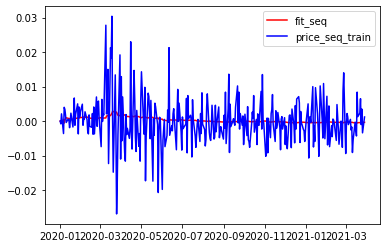

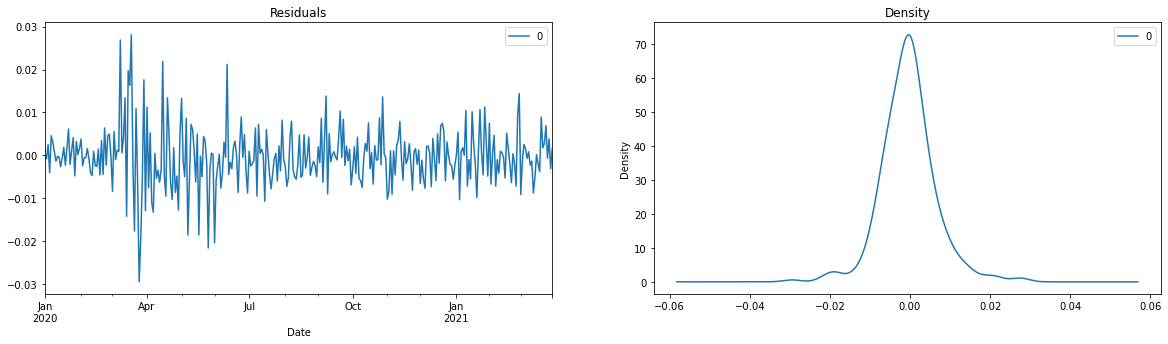

In [10]:
def residual_errors(timeseries,order):
    
    """
    Residual sequence of model fitting
    
    The residual sequence is the sequence obtained by subtracting the fitting sequence on the training data from the original sequence of the training data. 
    The more the sequence conforms to the random error distribution (normal distribution with a mean value of 0), the better the model fits.
    Otherwise, it means that there are still some factors that the model fails to consider.
    """
    
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.tsa.arima.model import ARIMA

    # ARIMA Model
    model = ARIMA(timeseries, order=order)
    model_fit = model.fit()
    
    # Actual vs Fitted
    train_predict = model_fit.predict()
    plt.plot(train_predict, color='red', label='fit_seq')
    plt.plot(timeseries, color='blue', label='price_seq_train')
    plt.legend(loc='best')
    plt.show()

    # Plot charts of Residual Sequence
    residuals = pd.DataFrame(model_fit.resid)
    fig, ax = plt.subplots(1,2,figsize = (20, 5))
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.show()
    

dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse) 

price_train_diff = price_train.diff(1)
price_train_diff = price_train_diff.fillna(0)  # optimal order of differencing is one.

# Residual Errors of Model 
residual_errors(price_train_diff, (0,1,1))

##### The density curve of the residuals is very close to the nearly normal distribution, indicating that the model is effective.
##### However, it can be seen from the fitting curve that we only fit the mean trend, but the fluctuation trend is not captured.

#### Next, we consider decomposing the trend and residual series to model.

### Decomposing

#### Decompose the trend and residual series to model

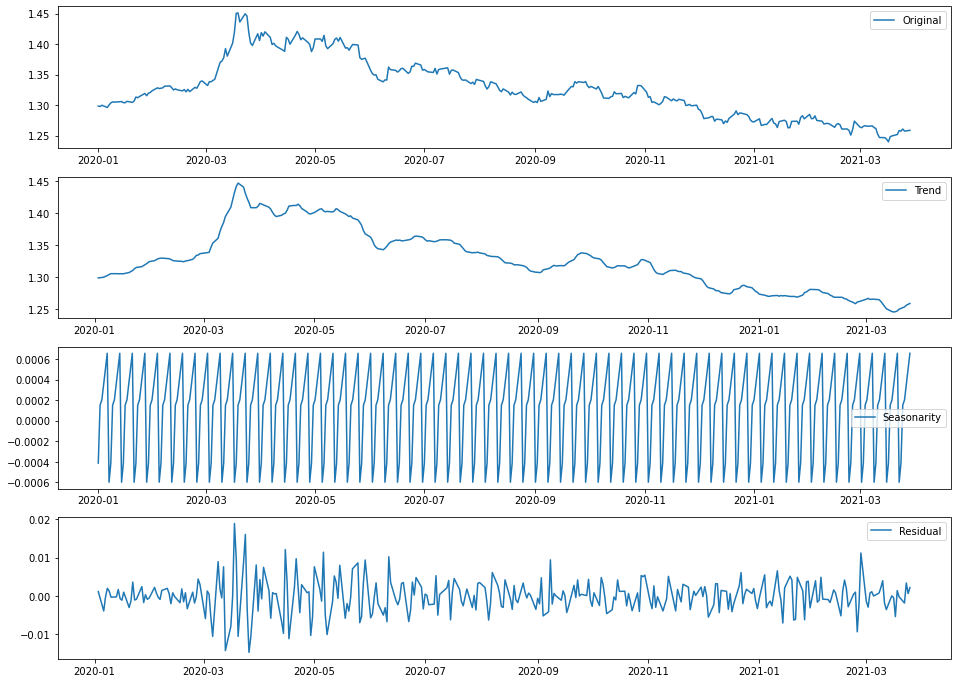

In [13]:
def decomposing(timeseries):
    
    """
    Decomposing 
    
    Use seasonal_decompose to decompose the trend and residual series to model.
    
    """

    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.tsa.seasonal import seasonal_decompose

    # decompose the trend and residual series to model.
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # plot relevant charts.
    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()


dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse) 

decomposing(price_train)

### ADF: Augmented Dickey-Fuller Unit Root  Tests

##### Check if it is a stationary series

Result of ADF--ct Test 
timeseries_adf :  (-3.055938702631747, 0.11710686850349061, 16, 303, {'1%': -3.9889626832421174, '5%': -3.4250798217949754, '10%': -3.135626889644655}, -3056.076634724039)
timeseries_diff1_adf :  (-4.580919205388595, 0.001109623361484107, 15, 304, {'1%': -3.98886231842259, '5%': -3.4250314955914445, '10%': -3.135598530756807}, -3048.3066497842874)
timeseries_diff2_adf :  (-6.750085883183334, 5.1527744135906054e-08, 17, 302, {'1%': -3.989063719813323, '5%': -3.425128470297718, '10%': -3.1356554373268746}, -3034.781959185652)


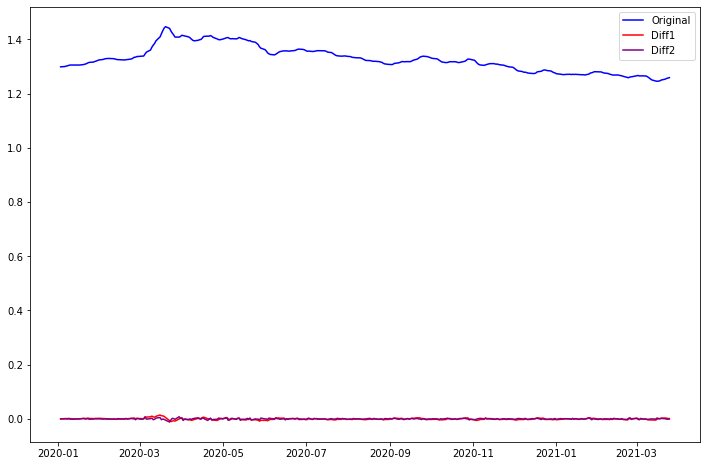

Result of ADF--c Test 
timeseries_adf :  (-0.7433910839892238, 0.8351879470185299, 17, 302, {'1%': -3.4521902441030963, '5%': -2.871158406898617, '10%': -2.5718948388228586}, -3046.833788194584)
timeseries_diff1_adf :  (-3.875625305010032, 0.002221737274878361, 16, 303, {'1%': -3.4521175397304784, '5%': -2.8711265007266666, '10%': -2.571877823851692}, -3048.2446305568355)
timeseries_diff2_adf :  (-6.756229549146597, 2.8671627613762637e-09, 17, 302, {'1%': -3.4521902441030963, '5%': -2.871158406898617, '10%': -2.5718948388228586}, -3036.678331302525)


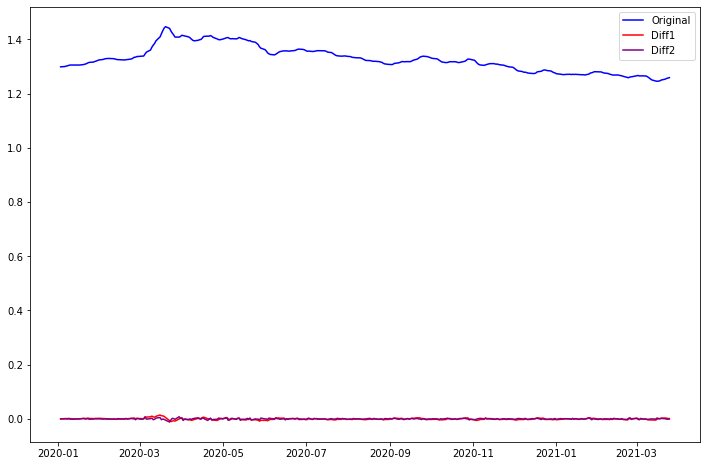

Result of ADF--nc Test 
timeseries_adf :  (-0.5584642864420315, 0.471949443168028, 17, 302, {'1%': -2.57318307925091, '5%': -1.941925165700877, '10%': -1.6159693664010901}, -3048.2728364506247)
timeseries_diff1_adf :  (-3.8481233719015617, 0.00013234828021924114, 16, 303, {'1%': -2.57315838381858, '5%': -1.9419219984292977, '10%': -1.6159720819356385}, -3049.941368871406)
timeseries_diff2_adf :  (-6.767262618113716, 2.001176130462399e-10, 17, 302, {'1%': -2.57318307925091, '5%': -1.941925165700877, '10%': -1.6159693664010901}, -3038.665160853288)


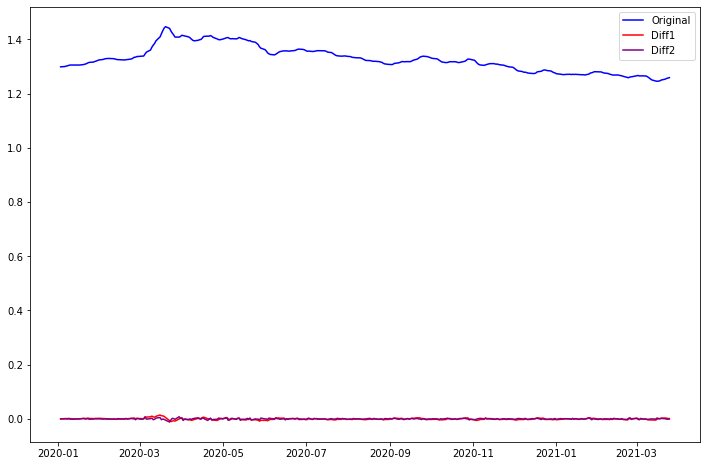

In [273]:
def ADF_diff_trend(timeseries):
    
    """
    ADF: Augmented Dickey-Fuller unit root test.
    
    Regression: Constant and trend order to include {“c”,”ct”,”ctt”,”nc”}
    1. “c” : constant only (default).
    2. “ct” : constant and trend.
    3. “ctt” : constant, and linear and quadratic trend.
    4. “nc” : no constant, no trend.
    """

    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.tsa.stattools import adfuller as ADF
    
    # Sequence after generating the differencing.
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)

    # ADF unit root test -- ct
    print('Result of ADF--ct Test ')
    timeseries_adf = ADF(timeseries['trend'].tolist(), regression='ct')
    timeseries_diff1_adf = ADF(timeseries_diff1['trend'].tolist(), regression='ct')
    timeseries_diff2_adf = ADF(timeseries_diff2['trend'].tolist(), regression='ct')

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()
    
    # ADF unit root test -- c
    print('Result of ADF--c Test ')
    timeseries_adf = ADF(timeseries['trend'].tolist(), regression='c')
    timeseries_diff1_adf = ADF(timeseries_diff1['trend'].tolist(), regression='c')
    timeseries_diff2_adf = ADF(timeseries_diff2['trend'].tolist(), regression='c')

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()
    
    # ADF unit root test -- nc
    print('Result of ADF--nc Test ')
    timeseries_adf = ADF(timeseries['trend'].tolist(), regression='nc')
    timeseries_diff1_adf = ADF(timeseries_diff1['trend'].tolist(), regression='nc')
    timeseries_diff2_adf = ADF(timeseries_diff2['trend'].tolist(), regression='nc')

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()

    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse)

decomposition = seasonal_decompose(price_train)
trend = decomposition.trend
seasonal = decomposition.seasonal

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)

trend = pd.DataFrame(trend)
trend.drop(trend.head(2).index,inplace=True) 
trend.drop(trend.tail(2).index,inplace=True) 
ADF_diff_trend(trend)

Result of ADF--ct Test 
timeseries_adf :  (-7.964664976460775, 8.623853075765575e-11, 12, 307, {'1%': -3.9885651881396162, '5%': -3.424888419060633, '10%': -3.135514568313964}, -2496.1774547950527)
timeseries_diff1_adf :  (-9.951437430572255, 2.925544805373518e-15, 15, 304, {'1%': -3.98886231842259, '5%': -3.4250314955914445, '10%': -3.135598530756807}, -2457.2641998784475)
timeseries_diff2_adf :  (-10.694309489567704, 8.70711100990507e-17, 17, 302, {'1%': -3.989063719813323, '5%': -3.425128470297718, '10%': -3.1356554373268746}, -2399.3373165181356)


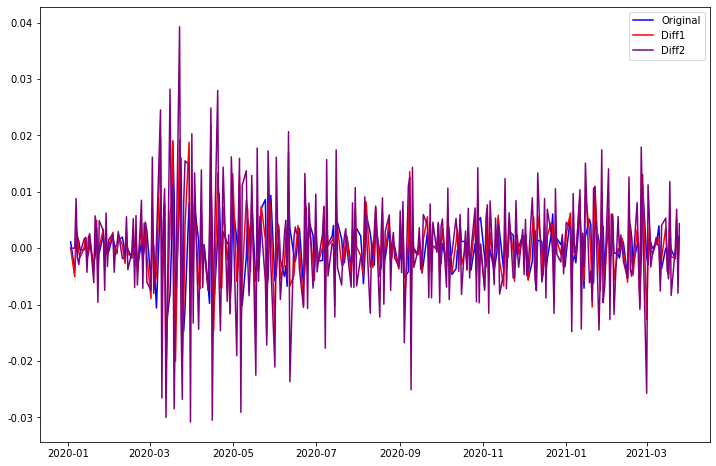

Result of ADF--c Test 
timeseries_adf :  (-7.975810900884797, 2.7044149244044007e-12, 12, 307, {'1%': -3.4518314994261337, '5%': -2.8710009653519166, '10%': -2.571810878948318}, -2498.106045255336)
timeseries_diff1_adf :  (-9.966727827776092, 2.2965608335726006e-17, 15, 304, {'1%': -3.452045317832011, '5%': -2.871094805558846, '10%': -2.571860921485457}, -2459.227146160347)
timeseries_diff2_adf :  (-10.716378801373672, 3.23352492451109e-19, 17, 302, {'1%': -3.4521902441030963, '5%': -2.871158406898617, '10%': -2.5718948388228586}, -2401.3190396246323)


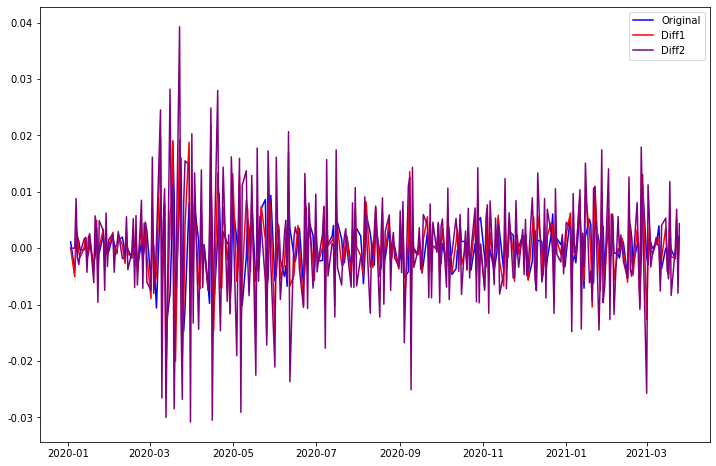

Result of ADF--nc Test 
timeseries_adf :  (-7.989101527819017, 3.474662794919612e-13, 12, 307, {'1%': -2.573061219323282, '5%': -1.9419095427688033, '10%': -1.6159827728793672}, -2500.099288696598)
timeseries_diff1_adf :  (-9.98419406109477, 1.0813809644767083e-17, 15, 304, {'1%': -2.573133851713989, '5%': -1.9419188527177456, '10%': -1.6159747801872995}, -2461.2263215169505)
timeseries_diff2_adf :  (-10.735415628654918, 2.580298243801501e-19, 17, 302, {'1%': -2.57318307925091, '5%': -1.941925165700877, '10%': -1.6159693664010901}, -2403.3165878178684)


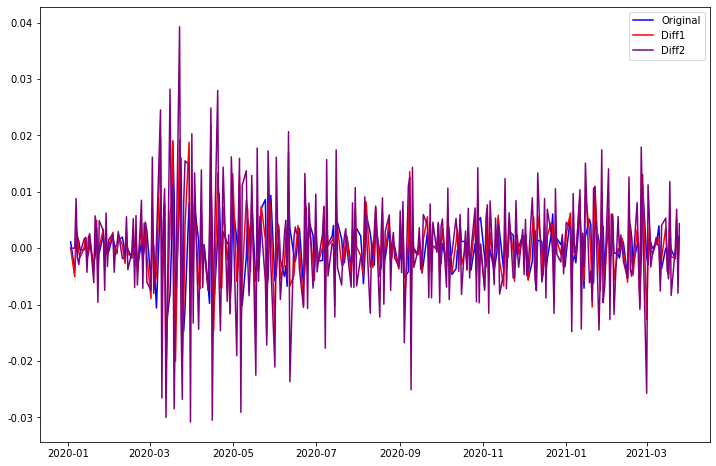

In [274]:
def ADF_diff_residual(timeseries):
    
    """
    ADF: Augmented Dickey-Fuller unit root test.
    
    Regression: Constant and trend order to include {“c”,”ct”,”ctt”,”nc”}
    1. “c” : constant only (default).
    2. “ct” : constant and trend.
    3. “ctt” : constant, and linear and quadratic trend.
    4. “nc” : no constant, no trend.
    """

    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.tsa.stattools import adfuller as ADF
    
    # Sequence after generating the differencing.
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)

    # ADF unit root test -- ct
    print('Result of ADF--ct Test ')
    timeseries_adf = ADF(timeseries['resid'].tolist(), regression='ct')
    timeseries_diff1_adf = ADF(timeseries_diff1['resid'].tolist(), regression='ct')
    timeseries_diff2_adf = ADF(timeseries_diff2['resid'].tolist(), regression='ct')

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()
    
    # ADF unit root test -- c
    print('Result of ADF--c Test ')
    timeseries_adf = ADF(timeseries['resid'].tolist(), regression='c')
    timeseries_diff1_adf = ADF(timeseries_diff1['resid'].tolist(), regression='c')
    timeseries_diff2_adf = ADF(timeseries_diff2['resid'].tolist(), regression='c')

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()
    
    # ADF unit root test -- nc
    print('Result of ADF--nc Test ')
    timeseries_adf = ADF(timeseries['resid'].tolist(), regression='nc')
    timeseries_diff1_adf = ADF(timeseries_diff1['resid'].tolist(), regression='nc')
    timeseries_diff2_adf = ADF(timeseries_diff2['resid'].tolist(), regression='nc')

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()

    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse)

decomposition = seasonal_decompose(price_train)
seasonal = decomposition.seasonal
residual = decomposition.resid

seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

residual = pd.DataFrame(residual)
residual.drop(residual.head(2).index,inplace=True) 
residual.drop(residual.tail(2).index,inplace=True) 

ADF_diff_residual(residual)

### ACF: Auto-Correlation Function

##### View the auto-correlation and partial auto-correlation of data

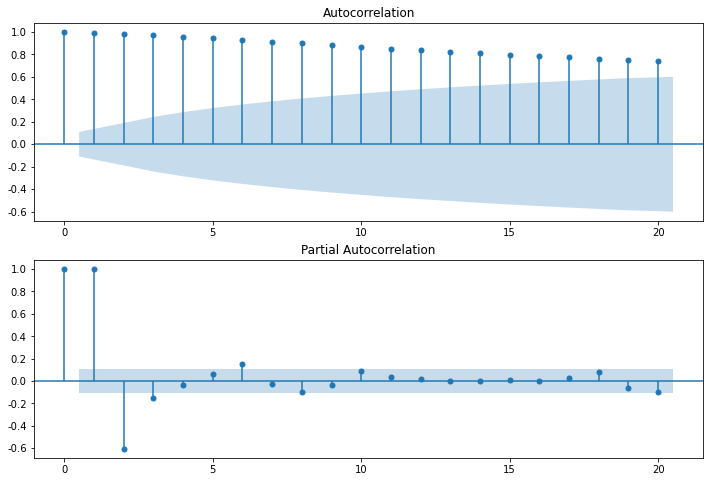

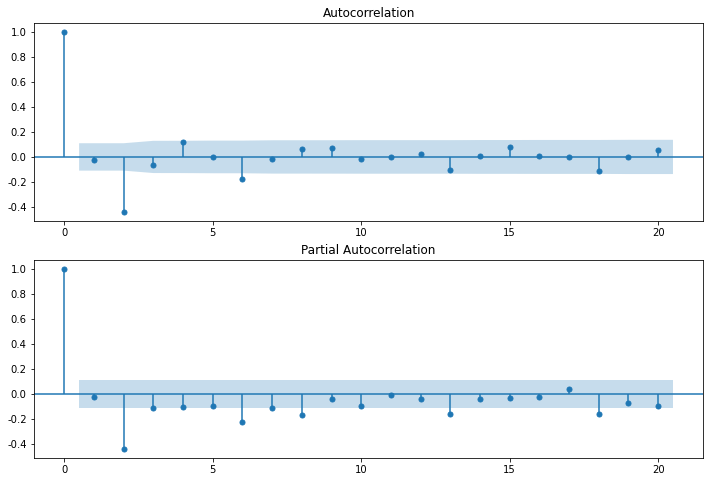

In [277]:
def autocorrelation(timeseries, lags):
    
    """
    View the auto-correlation and partial auto-correlation of data
    
    ACF: auto-correlation function which gives us values of auto-correlation of any series with its lagged values.
    PACF: partial auto-correlation function which finds correlation of the residuals with the next lag value.
    """
    
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt

    # ACF of data
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    
    # DCF of data
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()

    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse)

decomposition = seasonal_decompose(price_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend = pd.DataFrame(trend)
trend.drop(trend.head(2).index,inplace=True) 
trend.drop(trend.tail(2).index,inplace=True)

residual = pd.DataFrame(residual)
residual.drop(residual.head(2).index,inplace=True) 
residual.drop(residual.tail(2).index,inplace=True) 

autocorrelation(trend, 40)

autocorrelation(residual, 20)

### IC: Information Criterion

##### determine p and q values

In [278]:
def IC(timeseries):
    
    """
    IC(Information Criterion): to determine p and q values
    
    AIC: Akaike Information Criterion
    BIC: Bayesian Information Criterion
    """
    
    import statsmodels.api as sm
    
    # calculate AIC and BIC.
    IC_evaluate = sm.tsa.arma_order_select_ic(timeseries, ic=['aic', 'bic'], trend='nc', max_ar=6,
                                            max_ma=6)
    print('AIC', IC_evaluate.aic_min_order)
    print('BIC', IC_evaluate.bic_min_order)

    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse) 

decomposition = seasonal_decompose(price_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend = pd.DataFrame(trend)
trend.drop(trend.head(2).index,inplace=True) 
trend.drop(trend.tail(2).index,inplace=True) 

residual = pd.DataFrame(residual)
residual.drop(residual.head(2).index,inplace=True) 
residual.drop(residual.tail(2).index,inplace=True) 

IC(trend)
IC(residual)

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Chec

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARI

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warning

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/anaconda3/lib/pyt

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/anaconda3/lib/pyt

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/anaconda3/lib/pyt

AIC (1, 4)
BIC (1, 4)


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.ar

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warning

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warning

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.ar

AIC (4, 6)
BIC (0, 2)


### ARIMA_Model

In [16]:
def ARIMA_Model(timeseries, order):
    
    """
    ARIMA Model
    
    Notes:
    1. Time series data should choose the stationary series after differencing.
    2. Order includes p, d, q. 
        p is the order of AR. 
        d is the order of differencing. 
        q is the order of MA.
    3. Pandas will automatically determine the frequency of the data.
    """
    
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.seasonal import seasonal_decompose

    # Fit ARIMA Model
    model = ARIMA(timeseries, order=order)
    model_fit = model.fit()
    print(model_fit.summary())  # Summary of ARIMA

    return model_fit

from statsmodels.tsa.seasonal import seasonal_decompose

dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse) 

decomposition = seasonal_decompose(price_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend = pd.DataFrame(trend)
trend.drop(trend.head(2).index,inplace=True) 
trend.drop(trend.tail(2).index,inplace=True) 

residual = pd.DataFrame(residual)
residual.drop(residual.head(2).index,inplace=True) 
residual.drop(residual.tail(2).index,inplace=True) 

# Model training -- trend
trend_model = ARIMA_Model(trend, (1,0,4))
# trend_model = ARIMA_Model(trend, (6,0,2))

# Model training -- residual
residual_model = ARIMA_Model(residual, (0,0,2))
# residual_model = ARIMA_Model(residual, (1,0,1))

/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  trend   No. Observations:                  320
Model:                 ARIMA(1, 0, 4)   Log Likelihood                1631.478
Date:                Tue, 12 Oct 2021   AIC                          -3248.956
Time:                        11:19:20   BIC                          -3222.578
Sample:                    01-03-2020   HQIC                         -3238.423
                         - 03-25-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3270      0.050     26.727      0.000       1.230       1.424
ar.L1          0.9925      0.007    150.813      0.000       0.980       1.005
ma.L1          0.8492      0.044     19.090      0.0

/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/下载/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


### Residual Analysis

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


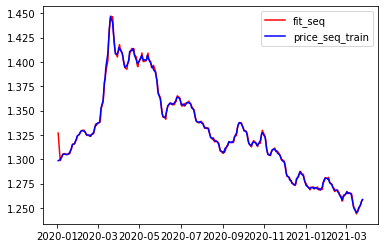

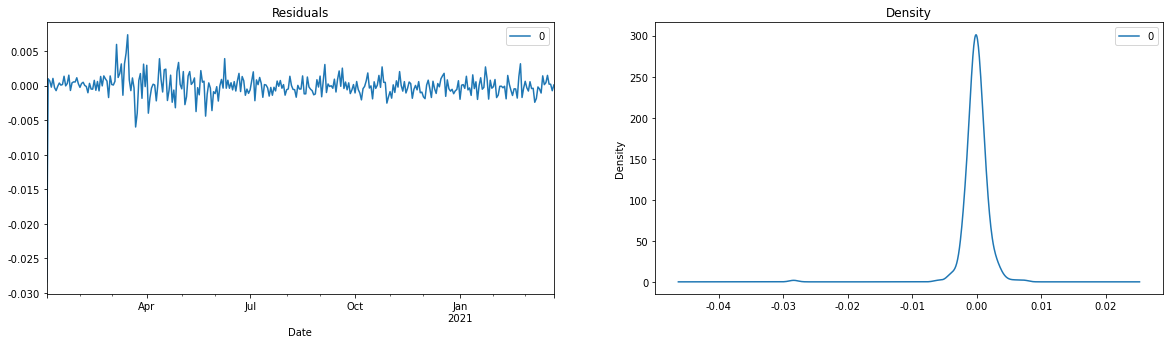

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


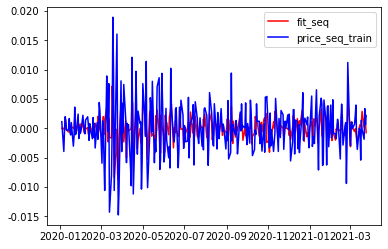

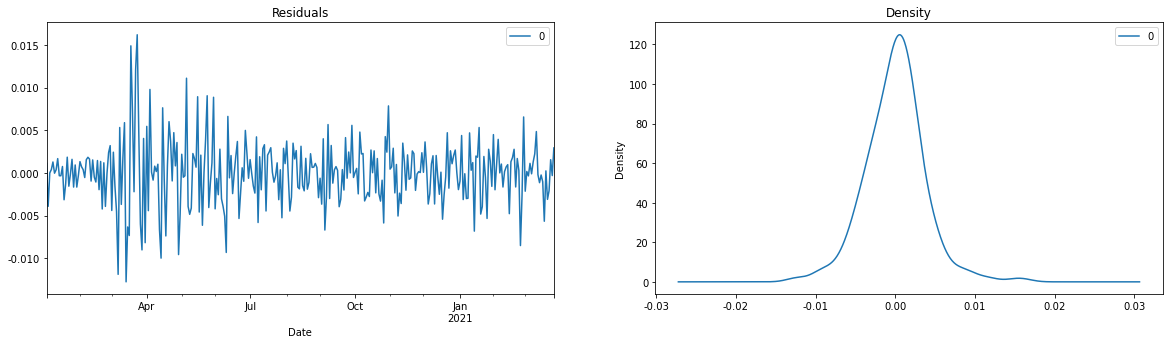

In [280]:
def residual_errors(timeseries,order):
    
    """
    Residual sequence of model fitting
    
    The residual sequence is the sequence obtained by subtracting the fitting sequence on the training data from the original sequence of the training data. 
    The more the sequence conforms to the random error distribution (normal distribution with a mean value of 0), the better the model fits.
    Otherwise, it means that there are still some factors that the model fails to consider.
    """
    
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.tsa.arima.model import ARIMA

    # ARIMA Model
    model = ARIMA(timeseries, order=order)
    model_fit = model.fit()
    
    # Actual vs Fitted
    train_predict = model_fit.predict()
    plt.plot(train_predict, color='red', label='fit_seq')
    plt.plot(timeseries, color='blue', label='price_seq_train')
    plt.legend(loc='best')
    plt.show()

    # Plot charts of Residual Sequence
    residuals = pd.DataFrame(model_fit.resid)
    fig, ax = plt.subplots(1,2,figsize = (20, 5))
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.show()
    

    
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse) 

decomposition = seasonal_decompose(price_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend = pd.DataFrame(trend)
trend.drop(trend.head(2).index,inplace=True) 
trend.drop(trend.tail(2).index,inplace=True)

residual = pd.DataFrame(residual)
residual.drop(residual.head(2).index,inplace=True)
residual.drop(residual.tail(2).index,inplace=True) 

# Residual Errors of Model 
residual_errors(trend, (1,0,4))
residual_errors(residual, (0,0,2))

#### It can be seen that our model fits very well. Next, we will make predictions.

### Prediction

In [379]:
# trend prediction
pred_trend = trend_model.get_prediction(start='2021-10-11', end='2021-10-15', dynamic=False)
pred_trend_ci = pred_trend.conf_int(alpha=0.25)

# residual prediction
pred_residual = residual_model.get_prediction(start='2021-10-11', end='2021-10-15', dynamic=False)
pred_residual_ci = pred_residual.conf_int(alpha=0.25)

# seasonal prediction
pred_seasonal = pd.DataFrame(seasonal['2020-01-07':'2020-01-13'])
pred_seasonal.index = pd.Series(['2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15']).apply(lambda dates: datetime.strptime(dates, '%Y-%m-%d'))
pred_seasonal['seasonal_copy'] = pred_seasonal['seasonal']

# price prediction
pred_residual_ci.columns = ['lower price','upper price']
pred_trend_ci.columns = ['lower price','upper price']
pred_seasonal.columns = ['lower price','upper price']
predict_seq = pred_residual_ci + pred_trend_ci + pred_seasonal
print(predict_seq)

            lower price  upper price
2021-10-11     1.244574     1.360407
2021-10-12     1.244882     1.360827
2021-10-13     1.245568     1.361621
2021-10-14     1.245742     1.361903
2021-10-15     1.246316     1.362583


#### Alternate method: auto_arima

In [ ]:
"""

Partial parameter analysis of auto_arima:
            1.start_p: the starting value of p, the order of the autoregressive ("AR") model (or the number of lag times), must be a positive integer
            2. start_q: the initial value of q, the order of the moving average (MA) model. Must be a positive integer.
            3. max_p: the maximum value of p, which must be a positive integer greater than or equal to start_p.
            4.max_q: the maximum value of q, which must be a positive integer greater than start_q
            5.seasonal: Is it suitable for seasonal ARIMA. The default is correct. Note that if season is true and m == 1, then season will be set to False.
            6.stationary: Whether the time series is stationary and whether d is zero.
            6. information_criterion: Information criterion is used to select the best ARIMA model. One of (‘aic’, ‘bic’, ‘hqic’, ‘oob’)
            7.alpha: The test significance of the test level, the default is 0.05
            8.test: If stationary is false and d is None, the type of unit root test used to detect stationarity. The default is ‘kpss’; it can be set to adf
            9.n_jobs: The number of models fitted in parallel in the grid search (stepwise = False). The default value is 1, but -1 can be used to mean "as much as possible".
            10.suppress_warnings: Many warnings may be thrown in statsmodel. If suppress_warnings is true, then all warnings from ARIMA will be suppressed
            11.error_action: If ARIMA cannot be matched for some reason, you can control the error handling behavior. (warn, raise, ignore, trace)
            12.max_d: the maximum value of d, that is, the maximum number of non-seasonal differences. Must be a positive integer greater than or equal to d.
            13.trace: Whether to print suitable status. If the value is False, no debugging information will be printed. If the value is true, some will be printed


import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(price_train, start_p=0, start_q=2,
                         information_criterion='aic',
                         test='adf',
                         max_p=6, max_q=6, m=5,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()


Notes：
The stepwise parameter here, the default value is True, 
which means that the stepwise algorithm is used to select the best parameter combination.
It will be much faster than calculating all parameter combinations, and it will hardly overfit. 
Of course, it is possible to ignore the optimal parameter combination.
So if you want the model to automatically calculate all parameter combinations, 
and then choose the best, you can set stepwise to False.
"""

### Rolling forecast

In [501]:
# Train the model, same as above

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_train = pd.read_csv('./data_train.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse) 

decomposition = seasonal_decompose(price_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend = pd.DataFrame(trend)
trend.drop(trend.head(2).index,inplace=True)
trend.drop(trend.tail(2).index,inplace=True) 

residual = pd.DataFrame(residual)
residual.drop(residual.head(2).index,inplace=True)
residual.drop(residual.tail(2).index,inplace=True) 

# Model training -- trend
trend_model = ARIMA(trend, order=(1,0,4))
trend_model_fit = trend_model.fit()

# Model training -- residual
residual_model = ARIMA(residual, order=(0,0,2))
residual_model_fit = residual_model.fit()


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [517]:
# Process the test set data
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
price_test = pd.read_csv('./data_test.csv', parse_dates=['Date'],
                                 index_col='Date', date_parser=dateparse) 

decomposition_test = seasonal_decompose(price_test)
trend_test = decomposition_test.trend
seasonal_test = decomposition_test.seasonal
residual_test = decomposition_test.resid

trend_test = trend_test.fillna(0)
seasonal_test = seasonal_test.fillna(0)
residual_test = residual_test.fillna(0)

trend_test = pd.DataFrame(trend_test)
trend_test.drop(trend_test.head(2).index,inplace=True) 
trend_test.drop(trend_test.tail(2).index,inplace=True) 

residual_test = pd.DataFrame(residual_test)
residual_test.drop(residual_test.head(2).index,inplace=True) 
residual_test.drop(residual_test.tail(2).index,inplace=True) 

In [518]:
# seasonal prediction
pred_seasonal = pd.DataFrame(seasonal['2020-01-02':'2020-01-08'])
pred_seasonal['seasonal_copy'] = pred_seasonal['seasonal']
pred_seasonal.columns = ['lower price','upper price']

trend_forecast_data = trend
residual_forecast_data = residual

# use for-loop to predict trend and residual data in the future by adding new daily data.
for i in range(len(trend_test)):
    if (i+1)%5 == 0:
            trend_NewModel = ARIMA(trend_forecast_data, order=(1,0,4))
            trend_NewModel_fit = trend_NewModel.fit()
            pred_trend_NewModel = trend_NewModel_fit.get_forecast(5)
            pred_trend_NewModel_ci = pred_trend_NewModel.conf_int(alpha=0.25)
        
            residual_NewModel = ARIMA(residual_forecast_data, order=(0,0,2))
            residual_NewModel_fit = residual_NewModel.fit()
            pred_residual_NewModel = residual_NewModel_fit.get_forecast(5)
            pred_residual_NewModel_ci = pred_residual_NewModel.conf_int(alpha=0.25)
        
            pred_seasonal.index = pred_trend_NewModel_ci.index
            pred_residual_NewModel_ci.columns = ['lower price','upper price']
            pred_trend_NewModel_ci.columns = ['lower price','upper price']
        
            predict_new_seq = pred_trend_NewModel_ci + pred_residual_NewModel_ci + pred_seasonal
            print(predict_new_seq)
                
    cur_trend = trend_test.iloc[i:i+1, :1]
    trend_forecast_data = trend_forecast_data.append(cur_trend, ignore_index=False)
    
    cur_residual = residual_test.iloc[i:i+1, :1]
    residual_forecast_data = residual_forecast_data.append(cur_residual, ignore_index=False)
 

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
324     1.252815     1.264793
325     1.251165     1.266868
326     1.250775     1.271744
327     1.247041     1.272735
328     1.245162     1.275930


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
329     1.246399     1.258074
330     1.248227     1.263711
331     1.245762     1.267244
332     1.243097     1.269278
333     1.241213     1.272442


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
334     1.246003     1.257647
335     1.242157     1.257591
336     1.242384     1.263786
337     1.239256     1.265337
338     1.237367     1.268471


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
339     1.225502     1.237188
340     1.221738     1.237423
341     1.220480     1.241946
342     1.216503     1.242702
343     1.214508     1.245794


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
344     1.217770     1.229530
345     1.212445     1.227897
346     1.210516     1.231201
347     1.205456     1.230866
348     1.203379     1.233862


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
349     1.208977     1.220706
350     1.208982     1.224403
351     1.207106     1.227777
352     1.204678     1.230087
353     1.202630     1.233110


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
354     1.202713     1.214385
355     1.201364     1.216715
356     1.197994     1.218575
357     1.193794     1.219079
358     1.191612     1.221942


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
359     1.202887     1.214511
360     1.200508     1.215792
361     1.198189     1.218658
362     1.194582     1.219722
363     1.192415     1.222564


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
364     1.201440     1.212809
365     1.200443     1.215531
366     1.198484     1.219428
367     1.196581     1.222160
368     1.194481     1.225035


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
369     1.203607     1.215111
370     1.202084     1.217204
371     1.199840     1.220075
372     1.196278     1.221120
373     1.194180     1.223960


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
374     1.222578     1.234067
375     1.224847     1.239950
376     1.223762     1.243982
377     1.222116     1.246952
378     1.220133     1.249925


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
379     1.225844     1.237364
380     1.224251     1.239393
381     1.221940     1.242245
382     1.218802     1.243737
383     1.216814     1.246704


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
384     1.234566     1.246051
385     1.234148     1.249245
386     1.232623     1.252862
387     1.229771     1.254621
388     1.227796     1.257560


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
389     1.242039     1.253537
390     1.241574     1.256721
391     1.240412     1.260737
392     1.237636     1.262564
393     1.235668     1.265483


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
394     1.246272     1.257731
395     1.246388     1.261481
396     1.244734     1.264978
397     1.242215     1.267026
398     1.240240     1.269900


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
399     1.249412     1.261002
400     1.248716     1.264033
401     1.246338     1.266920
402     1.242404     1.267605
403     1.240423     1.270498


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
404     1.244674     1.256029
405     1.238194     1.253345
406     1.237843     1.258917
407     1.232869     1.258533
408     1.230923     1.261442


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
409     1.246355     1.257839
410     1.245062     1.260246
411     1.243645     1.264062
412     1.240105     1.265087
413     1.238157     1.267960


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
414     1.245795     1.257258
415     1.246480     1.261634
416     1.244495     1.264872
417     1.241646     1.266567
418     1.239703     1.269413


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
419     1.264768     1.276217
420     1.269201     1.284350
421     1.268716     1.289102
422     1.267825     1.292806
423     1.265740     1.295560


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
424     1.257405     1.268982
425     1.257692     1.273019
426     1.254452     1.275126
427     1.251551     1.276830
428     1.249548     1.279652


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
429     1.252485     1.264043
430     1.249469     1.264797
431     1.245466     1.266164
432     1.240335     1.265644
433     1.238368     1.268503


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
434     1.260714     1.272269
435     1.257438     1.272775
436     1.255733     1.276436
437     1.251935     1.277216
438     1.249947     1.280016


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


     lower price  upper price
439     1.261009     1.272527
440     1.257824     1.273101
441     1.256986     1.277595
442     1.254279     1.279433
443     1.252296     1.282202


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
444     1.266521     1.278043
445     1.263133     1.278435
446     1.261308     1.281986
447     1.256400     1.281627
448     1.254411     1.284378


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lower price  upper price
449     1.265900     1.277439
450     1.262996     1.278311
451     1.261312     1.281993
452     1.257576     1.282794
453     1.255592     1.285525
     lower price  upper price
454     1.252220     1.263709
455     1.249166     1.264437
456     1.246567     1.267214
457     1.243263     1.268443
458     1.241349     1.271233


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
